In [ ]:
!pip install catboost

     |████████████████████████████████| 65.7MB 66kB/s 


In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 6.0MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490502 sha256=3eccff703803a7b6843633c2b225583fd4a3a4ba7154df46831c9cfac78c7694
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [ ]:
!pip install colorama

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.4MB/s 


In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=135e0d82e03981b149a21590cf166ad9ac1f4bb4376162b6041f5f689f7e4cee
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
%matplotlib inline
import shap
shap.initjs()
import time
import colorama  # https://pypi.python.org/pypi/colorama

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil import relativedelta
from sklearn.preprocessing import LabelEncoder

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier,Pool

### Metrics
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingClassifier

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
display(train_data.head(2))
display(test_data.head(2))

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
1                  NaN               22              30510.0         0

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  \
0  50883        C1          156             Owned          Individual   
1  50884        C4            7             Owned               Joint   

   Upper_Age  Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         30         30        No              NaN                     6.0   
1         69         68       Yes               X1                     3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  
0                  3.0                5              11934.0  
1                  3.0               18              32204.8

In [ ]:
print(train_data.shape,test_data.shape)

(50882, 14) (21805, 13)


In [ ]:
train_data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [ ]:
train_data['Holding_Policy_Duration'] = np.where((train_data['Holding_Policy_Duration']=='14+'),'15.0',train_data['Holding_Policy_Duration'])
train_data['Holding_Policy_Duration']

0        15.0
1         NaN
2         1.0
3        15.0
4         3.0
         ... 
50877     NaN
50878     7.0
50879    15.0
50880     2.0
50881     2.0
Name: Holding_Policy_Duration, Length: 50882, dtype: object

In [ ]:
train_data['Holding_Policy_Duration'].value_counts()

1.0     4499
15.0    4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [ ]:
test_data['Holding_Policy_Duration'] = np.where((test_data['Holding_Policy_Duration']=='14+'),'15.0',test_data['Holding_Policy_Duration'])
test_data['Holding_Policy_Duration']

0         6.0
1         3.0
2         2.0
3         3.0
4         NaN
         ... 
21800     4.0
21801     6.0
21802     NaN
21803     3.0
21804    15.0
Name: Holding_Policy_Duration, Length: 21805, dtype: object

In [ ]:
test_data['Holding_Policy_Duration'].value_counts()

15.0    1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64

In [ ]:
train_data.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [ ]:
test_data.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
dtype: object

In [ ]:
train_data['Holding_Policy_Duration'] = train_data['Holding_Policy_Duration'].fillna('0.0')
test_data['Holding_Policy_Duration'] = test_data['Holding_Policy_Duration'].fillna('0.0')

In [ ]:
train_data['Holding_Policy_Type'] = train_data['Holding_Policy_Type'].fillna(0.0)
test_data['Holding_Policy_Type'] = test_data['Holding_Policy_Type'].fillna(0.0)

In [ ]:
train_data['Holding_Policy_Duration'] = train_data['Holding_Policy_Duration'].astype(float)
test_data['Holding_Policy_Duration'] = test_data['Holding_Policy_Duration'].astype(float)

In [ ]:
train_data.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [ ]:
train_data['Health Indicator'] = train_data['Health Indicator'].fillna('UNK')
test_data['Health Indicator'] = test_data['Health Indicator'].fillna('UNK')

In [ ]:
train_data.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [ ]:
final_df = pd.concat([train_data,test_data],axis=0)
final_df.head(3)

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   

   Lower_Age Is_Spouse Health Indicator  Holding_Policy_Duration  \
0         36        No               X1                     15.0   
1         22        No               X2                      0.0   
2         32        No              UNK                      1.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0       0.0  
1                  0.0               22              30510.0       0.0  
2                  1.0               19               7450.0       1.0

In [ ]:
final_df.index = range(0,len(final_df))

In [ ]:
final_df.iloc[50880:50890,:]

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  \
50880  50881        C1            4             Owned               Joint   
50881  50882        C3         3866            Rented          Individual   
50882  50883        C1          156             Owned          Individual   
50883  50884        C4            7             Owned               Joint   
50884  50885        C1          564            Rented          Individual   
50885  50886        C3         1177            Rented          Individual   
50886  50887        C1          951             Owned          Individual   
50887  50888        C1         1329            Rented          Individual   
50888  50889        C2         3479             Owned          Individual   
50889  50890       C13          396            Rented          Individual   

       Upper_Age  Lower_Age Is_Spouse Health Indicator  \
50880         71         49        No               X2   
50881         24         24        No               X3   
50882         30         30        No              UNK   
50883         69         68       Yes               X1   
50884         28         28        No               X3   
50885         23         23        No               X3   
50886         75         75        No               X3   
50887         24         24        No               X2   
50888         56         56        No               X5   
50889         41         41        No              UNK   

       Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  \
50880                      2.0                  2.0               16   
50881                      2.0                  3.0               18   
50882                      6.0                  3.0                5   
50883                      3.0                  3.0               18   
50884                      2.0                  4.0               17   
50885                      3.0                  3.0               18   
50886                      0.0                  0.0                5   
50887                      0.0                  0.0               18   
50888                     15.0                  4.0               17   
50889                      0.0                  0.0               16   

       Reco_Policy_Premium  Response  
50880              28179.2       1.0  
50881              11424.0       0.0  
50882              11934.0       NaN  
50883              32204.8       NaN  
50884               9240.0       NaN  
50885               9086.0       NaN  
50886              22534.0       NaN  
50887               6150.0       NaN  
50888              19152.0       NaN  
50889              11034.0       NaN

In [ ]:
final_df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                   float64
dtype: object

In [ ]:
final_df = pd.get_dummies(final_df,drop_first=True)

In [ ]:
train_data_final = final_df.iloc[:50882,:]
test_data_final = final_df.iloc[50882:,:]

In [ ]:
train_data_final['Response'] = train_data_final['Response'].astype(int)
train_data_final

In [ ]:
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.head()

ID  Region_Code  Upper_Age  Lower_Age  Holding_Policy_Duration  \
50882  50883          156         30         30                      6.0   
50883  50884            7         69         68                      3.0   
50884  50885          564         28         28                      2.0   
50885  50886         1177         23         23                      3.0   
50886  50887          951         75         75                      0.0   

       Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  \
50882                  3.0                5              11934.0   
50883                  3.0               18              32204.8   
50884                  4.0               17               9240.0   
50885                  3.0               18               9086.0   
50886                  0.0                5              22534.0   

       City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  \
50882              0              0              0              0   
50883              0              0              0              0   
50884              0              0              0              0   
50885              0              0              0              0   
50886              0              0              0              0   

       City_Code_C14  City_Code_C15  City_Code_C16  City_Code_C17  \
50882              0              0              0              0   
50883              0              0              0              0   
50884              0              0              0              0   
50885              0              0              0              0   
50886              0              0              0              0   

       City_Code_C18  City_Code_C19  City_Code_C2  City_Code_C20  \
50882              0              0             0              0   
50883              0              0             0              0   
50884              0              0             0              0   
50885              0              0             0              0   
50886              0              0             0              0   

       City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
50882              0              0              0              0   
50883              0              0              0              0   
50884              0              0              0              0   
50885              0              0              0              0   
50886              0              0              0              0   

       City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
50882              0              0              0              0   
50883              0              0              0              0   
50884              0              0              0              0   
50885              0              0              0              0   
50886              0              0              0              0   

       City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  \
50882              0             0              0              0   
50883              0             0              0              0   
50884              0             0              0              0   
50885              0             1              0              0   
50886              0             0              0              0   

       City_Code_C32  City_Code_C33  City_Code_C34  City_Code_C35  \
50882              0              0              0              0   
50883              0              0              0              0   
50884              0              0              0              0   
50885              0              0              0              0   
50886              0              0              0              0   

       City_Code_C36  City_Code_C4  City_Code_C5  City_Code_C6  City_Code_C7  \
50882              0             0             0             0             0   
50883              0             1             0             0             0   
50884      

In [ ]:
test_data_final.index = range(0,len(test_data_final))

In [ ]:
train_data_final = train_data_final.drop('ID',axis=1)
test_data_final = test_data_final.drop('ID',axis=1)
display(train_data_final.head(2))
display(test_data_final.head(2))

Region_Code  Upper_Age  Lower_Age  Holding_Policy_Duration  \
0         3213         36         36                     15.0   
1         1117         75         22                      0.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  \
0                  3.0               22              11628.0         0   
1                  0.0               22              30510.0         0   

   City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   City_Code_C15  City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   City_Code_C2  City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  \
0             0              0              0              0              0   
1             0              0              0              0              0   

   City_Code_C24  City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  \
0              0             1              0              0              0   
1              0             0              0              0              0   

   City_Code_C33  City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  \
0              0              0              0              0             0   
1              0              0              0              0             0   

   City_Code_C5  City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0             0             0             0             0             0   
1             1             0             0             0             0   

   Accomodation_Type_Rented  Reco_Insurance_Type_Joint  Is_Spouse_Yes  \
0                         1                          0              0   
1                         0                          1              0   

   Health Indicator_X1  Health Indicator_X2  Health Indicator_X3  \
0                    1                    0                    0   
1                    0                    1                    0   

   Health Indicator_X4  Health Indicator_X5  Health Indicator_X6  \
0                    0                    0                    0   
1                    0                    0                    0   

   Health Indicator_X7  Health Indicator_X8  Health Indicator_X9  
0                    0                    0                    0  
1                    0                    0                    0

Region_Code  Upper_Age  Lower_Age  Holding_Policy_Duration  \
0          156         30         30                      6.0   
1            7         69         68                      3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  City_Code_C10  \
0                  3.0                5              11934.0              0   
1                  3.0               18              32204.8              0   

   City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  City_Code_C15  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  City_Code_C2  \
0              0              0              0              0             0   
1              0              0              0              0             0   

   City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  City_Code_C29  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  City_Code_C33  \
0             0              0              0              0              0   
1             0              0              0              0              0   

   City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  City_Code_C5  \
0              0              0              0             0             0   
1              0              0              0             1             0   

   City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0             0             0             0             0   
1             0             0             0             0   

   Accomodation_Type_Rented  Reco_Insurance_Type_Joint  Is_Spouse_Yes  \
0                         0                          0              0   
1                         0                          1              1   

   Health Indicator_X1  Health Indicator_X2  Health Indicator_X3  \
0                    0                    0                    0   
1                    1                    0                    0   

   Health Indicator_X4  Health Indicator_X5  Health Indicator_X6  \
0                    0                    0                    0   
1                    0                    0                    0   

   Health Indicator_X7  Health Indicator_X8  Health Indicator_X9  
0                    0                    0                    0  
1                    0                    0                    0

In [ ]:
print(train_data_final.shape)
print(test_data_final.shape)

(50882, 55)
(21805, 54)


MODEL Training

In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

print(X.shape)
print(y.shape)

(50882, 54)
(50882,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40705, 54) (10177, 54) (40705,) (10177,)


In [ ]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Support Vector Regression':[SVC()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=100)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators, X_train, y_train)

Logistic Regression fitted
KNN fitted
Decision Tree fitted
Support Vector Regression fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


In [ ]:
#applying the fitted models to the test dataset
def mpredict(estimators, X_test, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome

outcome = mpredict(estimators, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_data['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [ ]:
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome[m][0],4))
    print('Accuracy Score', round(outcome[m][1],4))
    print('Classification report \n ')
    print(outcome[m][2])
    print('\n')

------------------------Logistic Regression------------------------
F1 Score 0.4301
Accuracy Score 0.7548
Classification report 
 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7682
           1       0.00      0.00      0.00      2495

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177



------------------------KNN------------------------
F1 Score 0.4784
Accuracy Score 0.7074
Classification report 
 
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      7682
           1       0.24      0.09      0.13      2495

    accuracy                           0.71     10177
   macro avg       0.50      0.50      0.48     10177
weighted avg       0.63      0.71      0.65     10177



------------------------Decision Tree------------------------
F1 Score 0.5495
Accuracy Score 0.6

In [ ]:
print(metrics.roc_auc_score(y_test, estimators['Cat Boost'][0].predict_proba(X_test)[:, 1]))

0.6533577177786972


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
estimators_st = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=100)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators_st, X_train, y_train):
    for m in estimators_st:
        estimators_st[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators_st, X_train_st, y_train)

def mpredict(estimators_st, X_test_st, y_test):
    outcome = dict()
    for m in estimators_st:
        y_pred = estimators_st[m][0].predict(X_test_st)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome


outcome_st = mpredict(estimators_st, X_test_st, y_test)

for m in outcome_st:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome_st[m][0],4))
    print('Accuracy Score', round(outcome_st[m][1],4))
    print('Classification report \n ')
    print(outcome_st[m][2])
    print('\n')

Logistic Regression fitted
KNN fitted
Decision Tree fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------Logistic Regression------------------------
F1 Score 0.4301
Accuracy Score 0.7548
Classification report 
 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7682
           1       0.00      0.00      0.00      2495

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177



------------------------KNN------------------------
F1 Score 0.4956
Accuracy Score 0.7105
Classification report 
 
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      7682
           1       0.28      0.12      0.17      2495

    accuracy                           0.71     10177
   macro avg       0.52      0.51      0.50     10177
weighted avg       0.64      0.71      0.66     10177



------------------------Decision Tree------------------------
F1 Score 0.5536
Accuracy Score 0.6

In [ ]:
print(metrics.roc_auc_score(y_test, estimators_st['Cat Boost'][0].predict_proba(X_test_st)[:, 1]))

0.6533577177786972


In [ ]:
display(X.head())
display(test_data_final.head())

Region_Code  Upper_Age  Lower_Age  Holding_Policy_Duration  \
0         3213         36         36                     15.0   
1         1117         75         22                      0.0   
2         3732         32         32                      1.0   
3         4378         52         48                     15.0   
4         2190         44         44                      3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  City_Code_C10  \
0                  3.0               22              11628.0              0   
1                  0.0               22              30510.0              0   
2                  1.0               19               7450.0              0   
3                  3.0               19              17780.0              0   
4                  1.0               16              10404.0              0   

   City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  City_Code_C15  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  City_Code_C2  \
0              0              0              0              0             0   
1              0              0              0              0             0   
2              0              0              0              0             0   
3              0              0              0              0             0   
4              0              0              0              0             0   

   City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              1   
4              0              0              0              0              0   

   City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  City_Code_C29  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  City_Code_C33  \
0             1              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  City_Code_C5  \
0              0              0              0             0             0   
1              0              0              0             0             1   
2              0              0              0             0             1   
3              0              0              0             0             0   
4              0              0              0             0             0   

   City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0             0             0             0             0   
1             0             0             0             0   
2             0             0             0             0   
3             0             0  

Region_Code  Upper_Age  Lower_Age  Holding_Policy_Duration  \
0          156         30         30                      6.0   
1            7         69         68                      3.0   
2          564         28         28                      2.0   
3         1177         23         23                      3.0   
4          951         75         75                      0.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  City_Code_C10  \
0                  3.0                5              11934.0              0   
1                  3.0               18              32204.8              0   
2                  4.0               17               9240.0              0   
3                  3.0               18               9086.0              0   
4                  0.0                5              22534.0              0   

   City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  City_Code_C15  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  City_Code_C2  \
0              0              0              0              0             0   
1              0              0              0              0             0   
2              0              0              0              0             0   
3              0              0              0              0             0   
4              0              0              0              0             0   

   City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  City_Code_C29  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  City_Code_C33  \
0             0              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             1              0              0              0              0   
4             0              0              0              0              0   

   City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  City_Code_C5  \
0              0              0              0             0             0   
1              0              0              0             1             0   
2              0              0              0             0             0   
3              0              0              0             0             0   
4              0              0              0             0             0   

   City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0             0             0             0             0   
1             0             0             0             0   
2             0             0             0             0   
3             0             0  

In [ ]:
print(X.shape,test_data_final.shape)

(50882, 54) (21805, 54)


In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_data_final)

In [ ]:
model_cat_final_submit = CatBoostClassifier(verbose=0, n_estimators=500)
model_cat_final_submit = model_cat_final_submit.fit(X_st,y)

y_pred = model_cat_final_submit.predict(test_final_st)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
submission_df['Response'] = list(y_pred)
sub = submission_df[['ID','Response']]
sub.head(10)

ID  Response
0  50883         0
1  50884         0
2  50885         0
3  50886         0
4  50887         0
5  50888         0
6  50889         0
7  50890         0
8  50891         0
9  50892         0

In [ ]:
sub['Response'].value_counts()

0    21353
1      452
Name: Response, dtype: int64

In [ ]:
sub.to_csv('submit_Cat.csv',index=False)

In [ ]:
X.head()

Region_Code  Upper_Age  Lower_Age  Holding_Policy_Duration  \
0         3213         36         36                     15.0   
1         1117         75         22                      0.0   
2         3732         32         32                      1.0   
3         4378         52         48                     15.0   
4         2190         44         44                      3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  City_Code_C10  \
0                  3.0               22              11628.0              0   
1                  0.0               22              30510.0              0   
2                  1.0               19               7450.0              0   
3                  3.0               19              17780.0              0   
4                  1.0               16              10404.0              0   

   City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  City_Code_C15  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  City_Code_C2  \
0              0              0              0              0             0   
1              0              0              0              0             0   
2              0              0              0              0             0   
3              0              0              0              0             0   
4              0              0              0              0             0   

   City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              1   
4              0              0              0              0              0   

   City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  City_Code_C29  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  City_Code_C33  \
0             1              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  City_Code_C5  \
0              0              0              0             0             0   
1              0              0              0             0             1   
2              0              0              0             0             1   
3              0              0              0             0             0   
4              0              0              0             0             0   

   City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0             0             0             0             0   
1             0             0             0             0   
2             0             0             0             0   
3             0             0  

### Adversal Validation


In [ ]:
train_data_f = train_data.copy()
test_data_f = test_data.copy()

In [ ]:
train_data = train_data.drop('Response',axis=1)
print(train_data.shape,test_data.shape)

(50882, 13) (21805, 13)


In [ ]:
cat_cols = list(train_data.select_dtypes('object').columns)
cat_cols

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator']

In [ ]:
for col in train_data.columns:
    if col not in cat_cols:
        print(col)

ID
Region_Code
Upper_Age
Lower_Age
Holding_Policy_Duration
Holding_Policy_Type
Reco_Policy_Cat
Reco_Policy_Premium


In [ ]:
features = list(train_data.columns)
target = 'dataset_label'
train_data['dataset_label'] = 0
test_data['dataset_label'] = 1

In [ ]:
display(train_data.head())
display(test_data.head())

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator  Holding_Policy_Duration  \
0         36        No               X1                     15.0   
1         22        No               X2                      0.0   
2         32        No              UNK                      1.0   
3         48        No               X1                     15.0   
4         44        No               X2                      3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  dataset_label  
0                  3.0               22              11628.0              0  
1                  0.0               22              30510.0              0  
2                  1.0               19               7450.0              0  
3                  3.0               19              17780.0              0  
4                  1.0               16              10404.0              0

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  \
0  50883        C1          156             Owned          Individual   
1  50884        C4            7             Owned               Joint   
2  50885        C1          564            Rented          Individual   
3  50886        C3         1177            Rented          Individual   
4  50887        C1          951             Owned          Individual   

   Upper_Age  Lower_Age Is_Spouse Health Indicator  Holding_Policy_Duration  \
0         30         30        No              UNK                      6.0   
1         69         68       Yes               X1                      3.0   
2         28         28        No               X3                      2.0   
3         23         23        No               X3                      3.0   
4         75         75        No               X3                      0.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  dataset_label  
0                  3.0                5              11934.0              1  
1                  3.0               18              32204.8              1  
2                  4.0               17               9240.0              1  
3                  3.0               18               9086.0              1  
4                  0.0                5              22534.0              1

In [ ]:
all_cols = features + [target]
all_cols

['ID',
 'City_Code',
 'Region_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Upper_Age',
 'Lower_Age',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'dataset_label']

In [ ]:
def create_adversarial_data(df_train, df_test, cols, N_val=10000):
    df_master = pd.concat([df_train[cols], df_test[cols]], axis=0)
    ## We will do random sampling of combined dataframe of N_val , replace = False -- no repeat
    adversarial_test = df_master.sample(N_val, replace=False)
    ## Will make adversarial_train dataset which is not in adversarial_test
    adversarial_train = df_master[~df_master.index.isin(adversarial_test.index)]
    return adversarial_train, adversarial_test

In [ ]:
train_data.shape , test_data.shape

((50882, 14), (21805, 14))

In [ ]:
adversarial_train, adversarial_test = create_adversarial_data(train_data, test_data, all_cols, 15000)
adversarial_train.shape, adversarial_test.shape

((50604, 14), (15000, 14))

In [ ]:
cat_cols

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator']

In [ ]:
adversarial_train.head(2)

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   

   Lower_Age Is_Spouse Health Indicator  Holding_Policy_Duration  \
2         32        No              UNK                      1.0   
3         48        No               X1                     15.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  dataset_label  
2                  1.0               19               7450.0              0  
3                  3.0               19              17780.0              0

In [ ]:
features

['ID',
 'City_Code',
 'Region_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Upper_Age',
 'Lower_Age',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium']

In [ ]:
train_data = Pool(
    data=adversarial_train[features],
    label=adversarial_train[target],
    cat_features=cat_cols
)
holdout_data = Pool(
    data=adversarial_test[features],
    label=adversarial_test[target],
    cat_features=cat_cols
)

params = {
    'iterations': 100,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'od_wait': 50,
#     'task_type': 'GPU', # if you have GPU
    'devices': '2', 
}

In [ ]:
model = CatBoostClassifier(**params)
_ = model.fit(train_data, eval_set=holdout_data, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

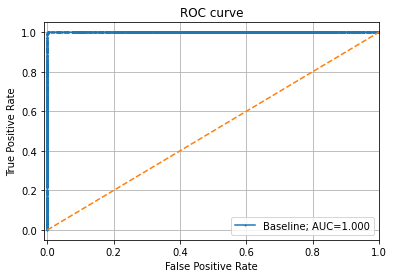

In [ ]:
plot_roc(
    [holdout_data.get_label()],
    [model.predict_proba(holdout_data)[:,1]],
    ['Baseline']
)

In [ ]:
def plot_importances(model, holdout_data, features):
    explainer = shap.TreeExplainer(model)

    shap_values = model.get_feature_importance(holdout_data, type='ShapValues')
    expected_value = shap_values[0,-1]
    shap_values = shap_values[:,:-1]
    shap.summary_plot(shap_values, holdout_data, feature_names=features, plot_type='bar')

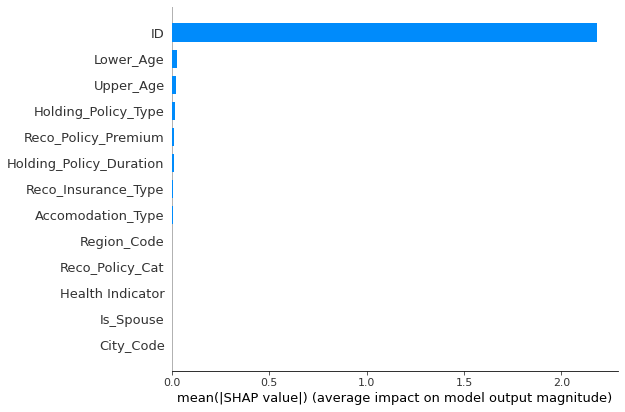

In [ ]:
plot_importances(model, holdout_data, features)

In [ ]:
params

{'devices': '2',
 'eval_metric': 'AUC',
 'iterations': 100,
 'od_type': 'Iter',
 'od_wait': 50}

In [ ]:
params2 = dict(params)
params2.update({"ignored_features": ['ID']})
params2

{'devices': '2',
 'eval_metric': 'AUC',
 'ignored_features': ['ID'],
 'iterations': 100,
 'od_type': 'Iter',
 'od_wait': 50}

In [ ]:
model2 = CatBoostClassifier(**params2)
_ = model2.fit(train_data, eval_set=holdout_data, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
plot_roc(
    [holdout_data.get_label()]*2,
    [model.predict_proba(holdout_data)[:,1], model2.predict_proba(holdout_data)[:,1]],
    ['Baseline', 'Removing ID']
)

In [ ]:
plot_importances(model2, holdout_data, features)

In [ ]:
params3 = dict(params)
params3.update({"ignored_features": ['ID','Region_Code']})
model3 = CatBoostClassifier(**params3)
_ = model3.fit(train_data, eval_set=holdout_data, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

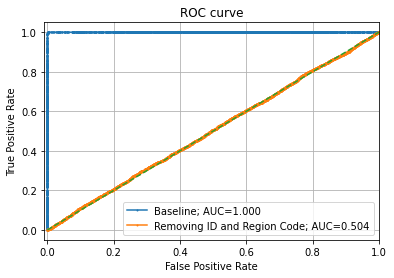

In [ ]:
plot_roc(
    [holdout_data.get_label()]*2,
    [model.predict_proba(holdout_data)[:,1], model3.predict_proba(holdout_data)[:,1]],
    ['Baseline', 'Removing ID and Region Code']
)

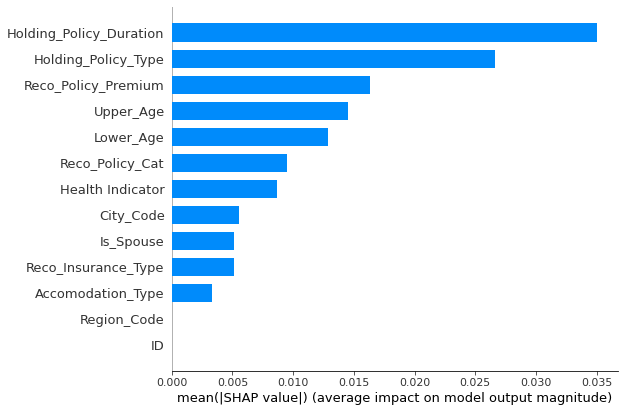

In [ ]:
plot_importances(model3, holdout_data, features)

In [ ]:
train_data_f['Region_Code'].unique()

array([3213, 1117, 3732, ..., 5326, 6149, 5450])

In [ ]:
test_data_f['Region_Code'].unique()

array([ 156,    7,  564, ..., 4778, 4555, 5204])

In [ ]:
set(test_data_f['Region_Code'].unique().tolist()).issubset(set(train_data_f['Region_Code'].unique()))

False

In [ ]:
print(train_data_final.shape)
print(test_data_final.shape)

(50882, 55)
(21805, 54)


In [ ]:
train_data_final = train_data_final.drop('Region_Code',axis=1)
test_data_final = test_data_final.drop('Region_Code',axis=1)
print(train_data_final.shape)
print(test_data_final.shape)

(50882, 54)
(21805, 53)


MODEL Training

In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

print(X.shape)
print(y.shape)

(50882, 53)
(50882,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40705, 53) (10177, 53) (40705,) (10177,)


In [ ]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Support Vector Regression':[SVC()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=100)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators, X_train, y_train)

Logistic Regression fitted
KNN fitted
Decision Tree fitted
Support Vector Regression fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


In [ ]:
#applying the fitted models to the test dataset
def mpredict(estimators, X_test, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome

outcome = mpredict(estimators, X_test, y_test)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome[m][0],4))
    print('Accuracy Score', round(outcome[m][1],4))
    print('Classification report \n ')
    print(outcome[m][2])
    print('\n')

------------------------Logistic Regression------------------------
F1 Score 0.4301
Accuracy Score 0.7548
Classification report 
 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7682
           1       0.00      0.00      0.00      2495

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177



------------------------KNN------------------------
F1 Score 0.4969
Accuracy Score 0.7107
Classification report 
 
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      7682
           1       0.29      0.12      0.17      2495

    accuracy                           0.71     10177
   macro avg       0.52      0.51      0.50     10177
weighted avg       0.64      0.71      0.66     10177



------------------------Decision Tree------------------------
F1 Score 0.5477
Accuracy Score 0.6

In [ ]:
print(metrics.roc_auc_score(y_test, estimators['Cat Boost'][0].predict_proba(X_test)[:, 1]))

0.6524448010835522


In [ ]:
print(metrics.roc_auc_score(y_test, estimators['Decision Tree'][0].predict_proba(X_test)[:, 1]))

0.548445211172149


#### Original Cat Boost

In [ ]:
train_data_f.shape

(50882, 14)

In [ ]:
train_data_f_cat = train_data_f.copy()
test_data_f_cat = test_data_f.copy()

In [ ]:
train_data_f_cat.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [ ]:
train_data_f_cat = train_data_f_cat.drop(['ID','Region_Code'],axis=1)

In [ ]:
test_data_f_cat = test_data_f_cat.drop(['ID','Region_Code'],axis=1)

In [ ]:
print(train_data_f_cat.shape,test_data_f_cat.shape)

(50882, 12) (21805, 11)


In [ ]:
features = list(train_data_f_cat.columns)
features

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Upper_Age',
 'Lower_Age',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Response']

In [ ]:
features.remove('Response')
features

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Upper_Age',
 'Lower_Age',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium']

In [ ]:
cat_cols = list(train_data_f_cat.select_dtypes('object').columns)
cat_cols

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator']

In [ ]:
target = 'Response'

In [ ]:
all_cols = features + [target]
all_cols

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Upper_Age',
 'Lower_Age',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Response']

In [ ]:
train_data_f_cat.shape

(50882, 12)

In [ ]:
adversarial_test= train_data_f_cat.sample(17000,replace=False)
adversarial_train = train_data_f_cat[~train_data_f_cat.index.isin(adversarial_test.index)]

In [ ]:
#adversarial_train, adversarial_test = create_adversarial_data(train_data, test_data, all_cols, 15000)
adversarial_train.shape, adversarial_test.shape

((33882, 12), (17000, 12))

In [ ]:
features

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Upper_Age',
 'Lower_Age',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium']

In [ ]:
train_data = Pool(
    data=adversarial_train[features],
    label=adversarial_train[target],
    cat_features=cat_cols
)
holdout_data = Pool(
    data=adversarial_test[features],
    label=adversarial_test[target],
    cat_features=cat_cols
)

params = {
    'iterations': 100,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'od_wait': 50,
#     'task_type': 'GPU', # if you have GPU
    'devices': '2', 
}

In [ ]:
model = CatBoostClassifier(**params)
_ = model.fit(train_data, eval_set=holdout_data, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

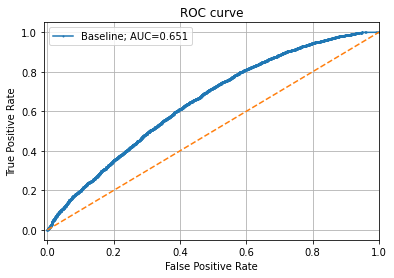

In [ ]:
plot_roc(
    [holdout_data.get_label()],
    [model.predict_proba(holdout_data)[:,1]],
    ['Baseline']
)

In [ ]:
def plot_importances(model, holdout_data, features):
    explainer = shap.TreeExplainer(model)

    shap_values = model.get_feature_importance(holdout_data, type='ShapValues')
    expected_value = shap_values[0,-1]
    shap_values = shap_values[:,:-1]
    shap.summary_plot(shap_values, holdout_data, feature_names=features, plot_type='bar')

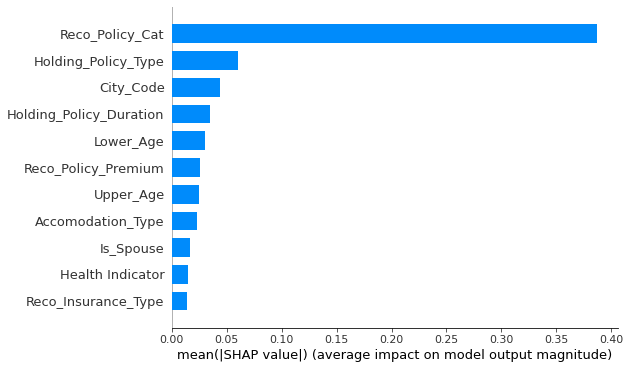

In [ ]:
plot_importances(model, holdout_data, features)